In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [3]:
from sklearn import datasets

# Load datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Generate a pandas DF
df = pd.DataFrame(features)
df.columns = iris.feature_names

In [4]:
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Print data set information
print(df.shape)
print(df.head(20))

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [7]:
# Print dataset desc and class distribution
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


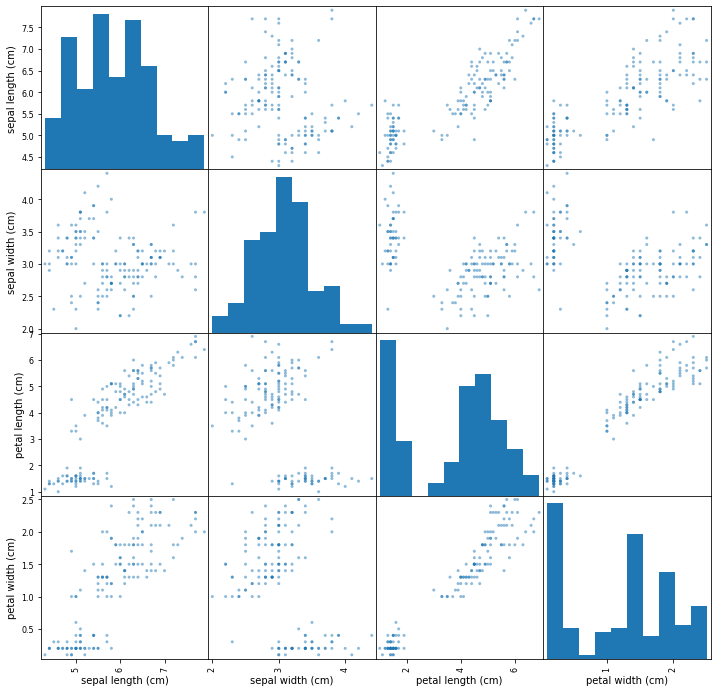

In [11]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Display scatter plot matrix
scatter_matrix(df, figsize = (12,12))
plt.show()

In [9]:
# Elbow method to determine optimal number of cluster
from sklearn.cluster import KMeans

# empty x and y data lists
X = []
Y = []

for i in range(1,31):
    # initalize and fit the kmeans model
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    
    # append the number of clustes to x data list
    X.append(i)
    
    # append the average within-cluster sum of squares to y data list
    awcss = kmeans.inertia_ / df.shape[0]
    Y.append(awcss)       
        

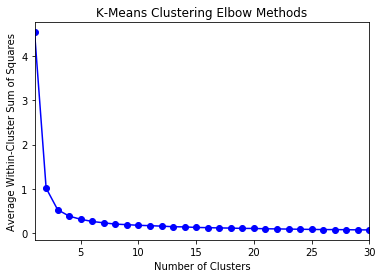

In [10]:
import matplotlib.pyplot as plt

# plot the x and y data
plt.plot(X,Y, "bo-")
plt.xlim(1,30)
plt.xlabel('Number of Clusters')
plt.ylabel("Average Within-Cluster Sum of Squares")
plt.title("K-Means Clustering Elbow Methods")
plt.show()

## Principle Component Analysis (PCA)

In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing



In [13]:
# Perform the PCA 
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)

# Print new dimensions
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [14]:
# re-fit the kmeans model to the principal components with the approprairte no of clustes
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# Visualize the high dimesnsional clusters using principle components

# set size for mesh
h = 0.02

# generate the mesh grid
x_min, x_max = pc[:,0].min() - 1, pc[:,0].max() + 1
y_min, y_max = pc[:,1].min() - 1, pc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Generate color plot from results
z = Z.reshape(xx.shape)